# Questão 1: Explique os seguintes conceitos fundamentais dos LLMs, fornecendo exemplos práticos e diagramas onde for relevante:

- Pre-training
- Transfer Learning
- Embeddings
- Transformers
- Attention
- Fine-Tunning

Pre-training: Se refere ao treinamento do zero de um modelo, com um grande volume de dados, e de forma não supervisionada. Esses modelos posteriormente podem ser usados no treinamento de outros modelos, para tarefas mais específicas, através de transfer learning ou fine tuning.

Transfer Learning: é uma técnica de treinamento de um modelo para uma tarefa específica utilizando um modelo pré-treinado com uma tarefa relacionada. Por exemplo, pode-se utilizar um modelo pré-treinado com imagens de vários animais como ponto de partida para o treinamento de um outro modelo que queira identificar apenas imagens de insetos. No transfer learning, as camadas do modelo pré-treinado não são alteradas e novas camadas são criadas para resolver a nova tarefa. Dessa forma, o novo modelo utiliza das features já calculadas pelo modelo anterior, enquanto que também adapta as suas saídas para o contexto atual.

Embedding: são os vetores multidimensonais que expressam as relações semânticas e sintáticas das palavras ou tokens que serão processados pela LLM.

Transformers:
É uma arquitetura composta geralmente pelo encoder e/ou decoder. O encoder se especializa no entendimento da entrada de dados, enquanto que o decoder se especializa na geração de dados. Existem modelo que utilizam apenas encoder, apenas decoder e que utilizam os dois. 
Modelos baseados apenas em encoder, como o Bert são bons em tarefas como classificação, reconhecimento de entidades nomeadas e responder perguntas. Modelos baseados apenas em decoder, como o GPT, são bons em completar frases, escrever artigos e geração de código. Modelos com encoder e decoder, são bons em tarefas como tradução de linguagens e sumarização.

Attention: é um mecanismo utilizado na arquitetura transformer, tanto no encoder quanto no decoder. Ele é responsável por atribuir pesos diferentes a cada parte das entradas para produzir uma saída. Isso permite identificar relações existentes na sequência dos dados de entrada. Isso permite a paralelização do processamento dos dados, além do aumento da janela de contexto e flexibilização do tamanho das entradas.

Fine-Tunning: é uma técnica se utiliza de um modelo pré-treinado como ponto de partida, assim como o Transfer Learning. A diferença entre eles, é que no Fine Tuning as camadas do modelo pré-treinado são alteradas durante o treinamento do novo modelo enquanto que novas camadas também são criadas para resolver o problema. Dessa forma, as features já treinadas pelo modelo anterior, mais generalizadas, são reajustadas para resolver a nova tarefa.

#  Questão 2: Acesse os quizzes dos capítulos 1, 2 e 3 do curso de NLP da Hugging Face através do link: Curso de NLP.
1.Resolva os quizzes e capture screenshots dos resultados.
2.Anexe as screenshots a esta avaliação e explique brevemente os conceitos abordados em cada quiz.

## Quiz 1
Os temas abordados foram os conceitos de LLM como Transfer Learning, Tranformers, modelos prétreinados, e o método pipeline da biblioteca Transformers. Além disso, o quiz abordou os tipos de modelos existentes, e a vantagem que cada arquitetura oferece, por exemplo tarefas em que é melhor usar modelos encoder, modelos decoder e modelos encoder-decoder
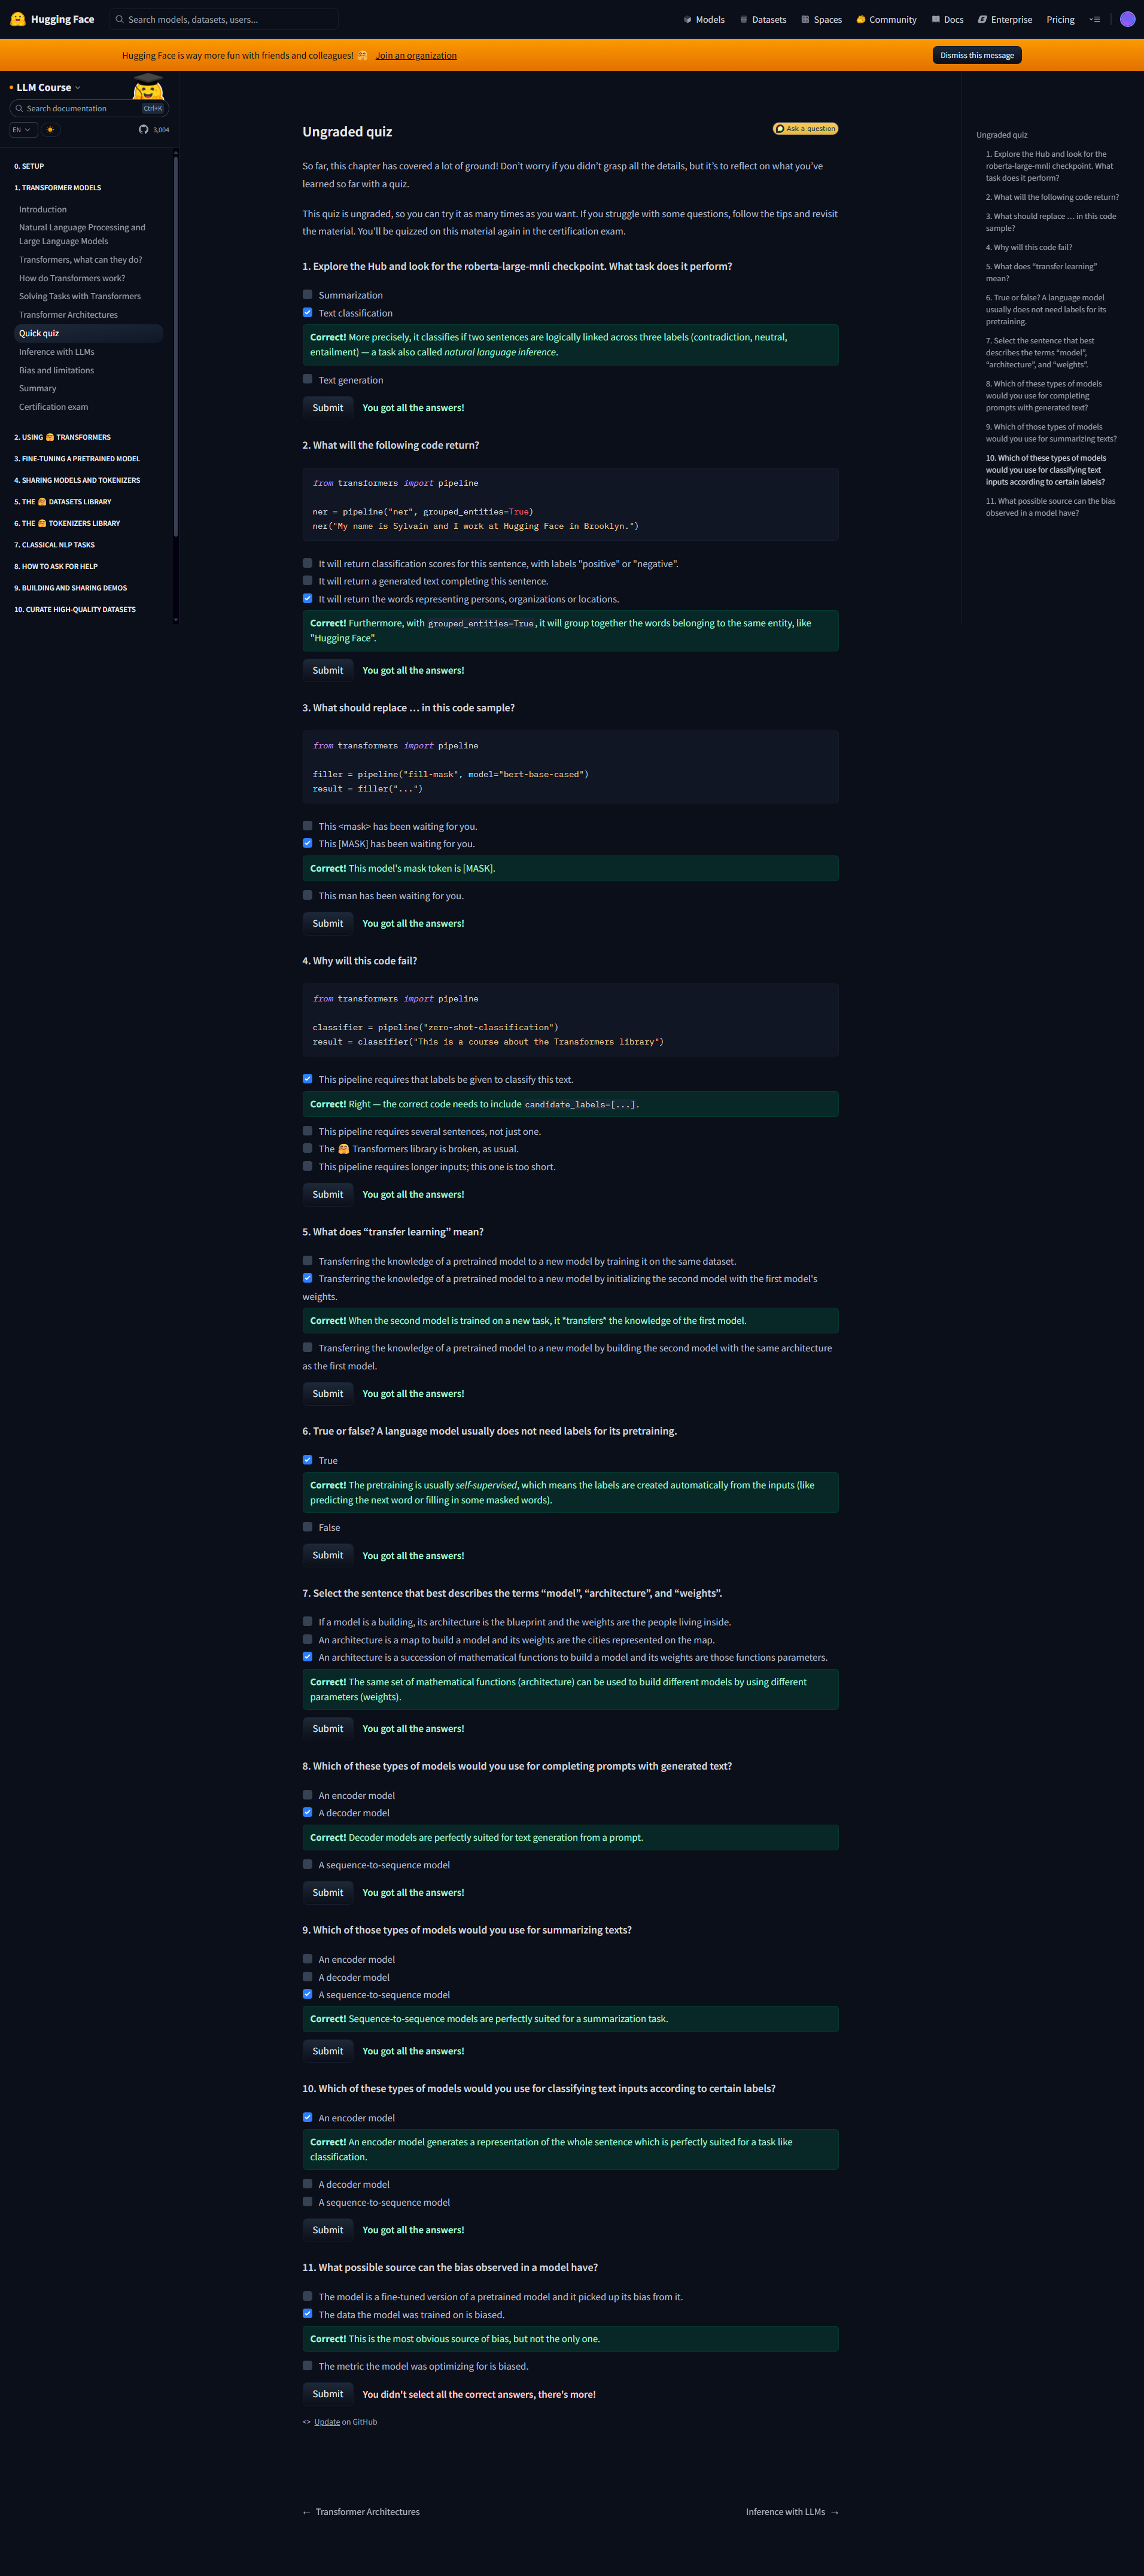

## Quiz 2
Esse quiz abordou o tema de tokenização, o que faz, seus retornos, e como ele se encaixa dentro do fluxo de um input de texto ser processado por um modelo, além de apresentar diferentes abordagens de tokenização. Além disso, foi apresentado a função AutoModel, e suas derivação AutoModel*.
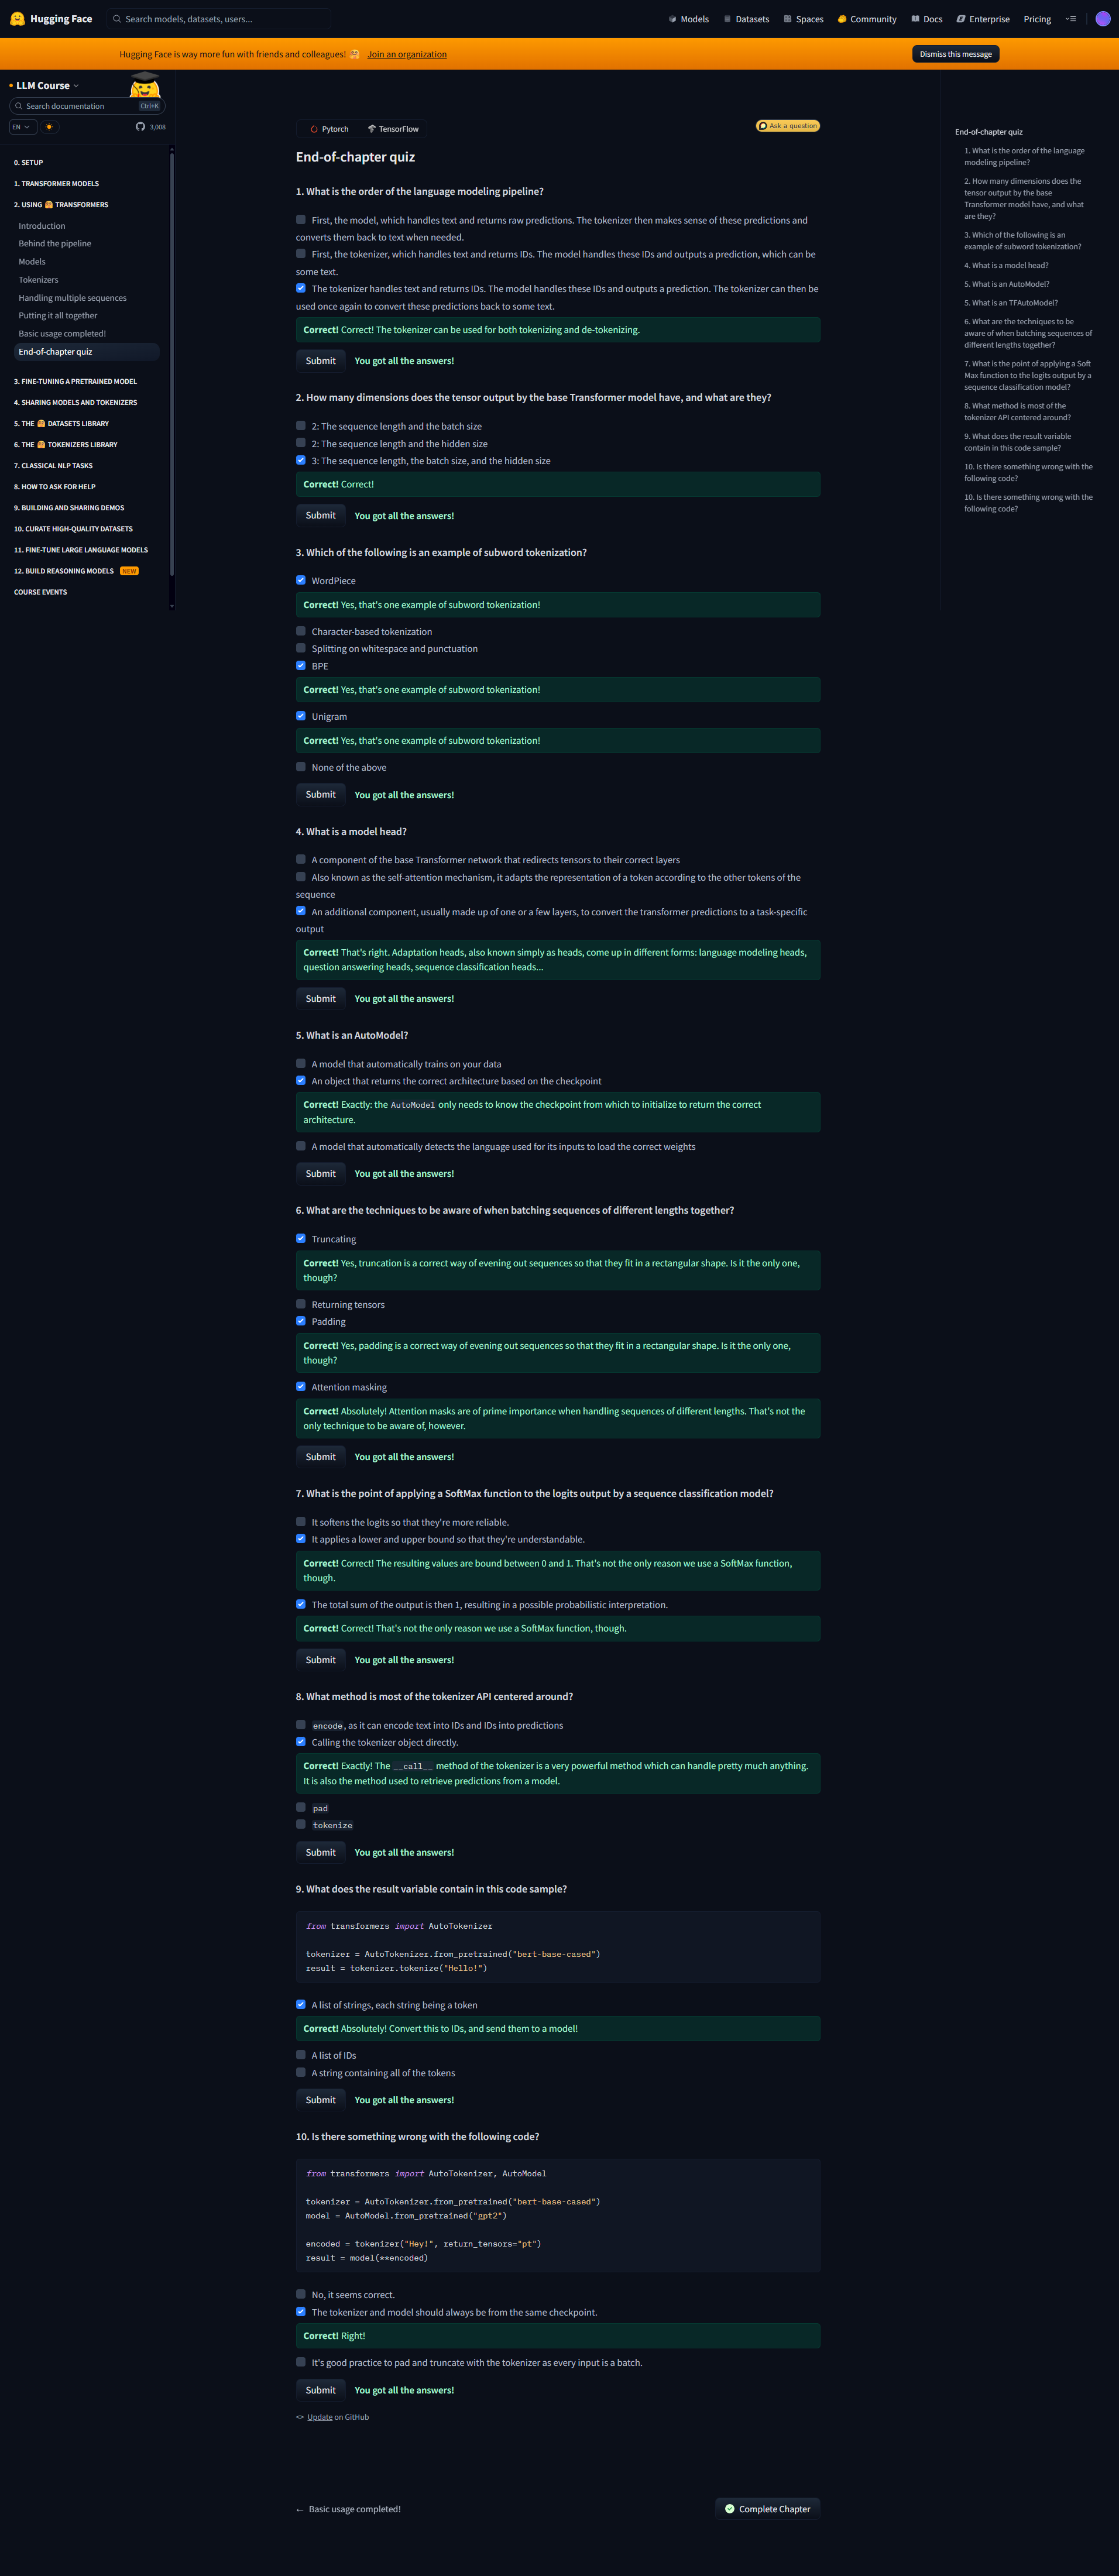

## Quiz 3
Esse quiz foi mais focado no processo de Fine-Tuning, como baixar datasets, mapeá-los e trata-los para realizar um novo treinamento de um modelo escolhido.
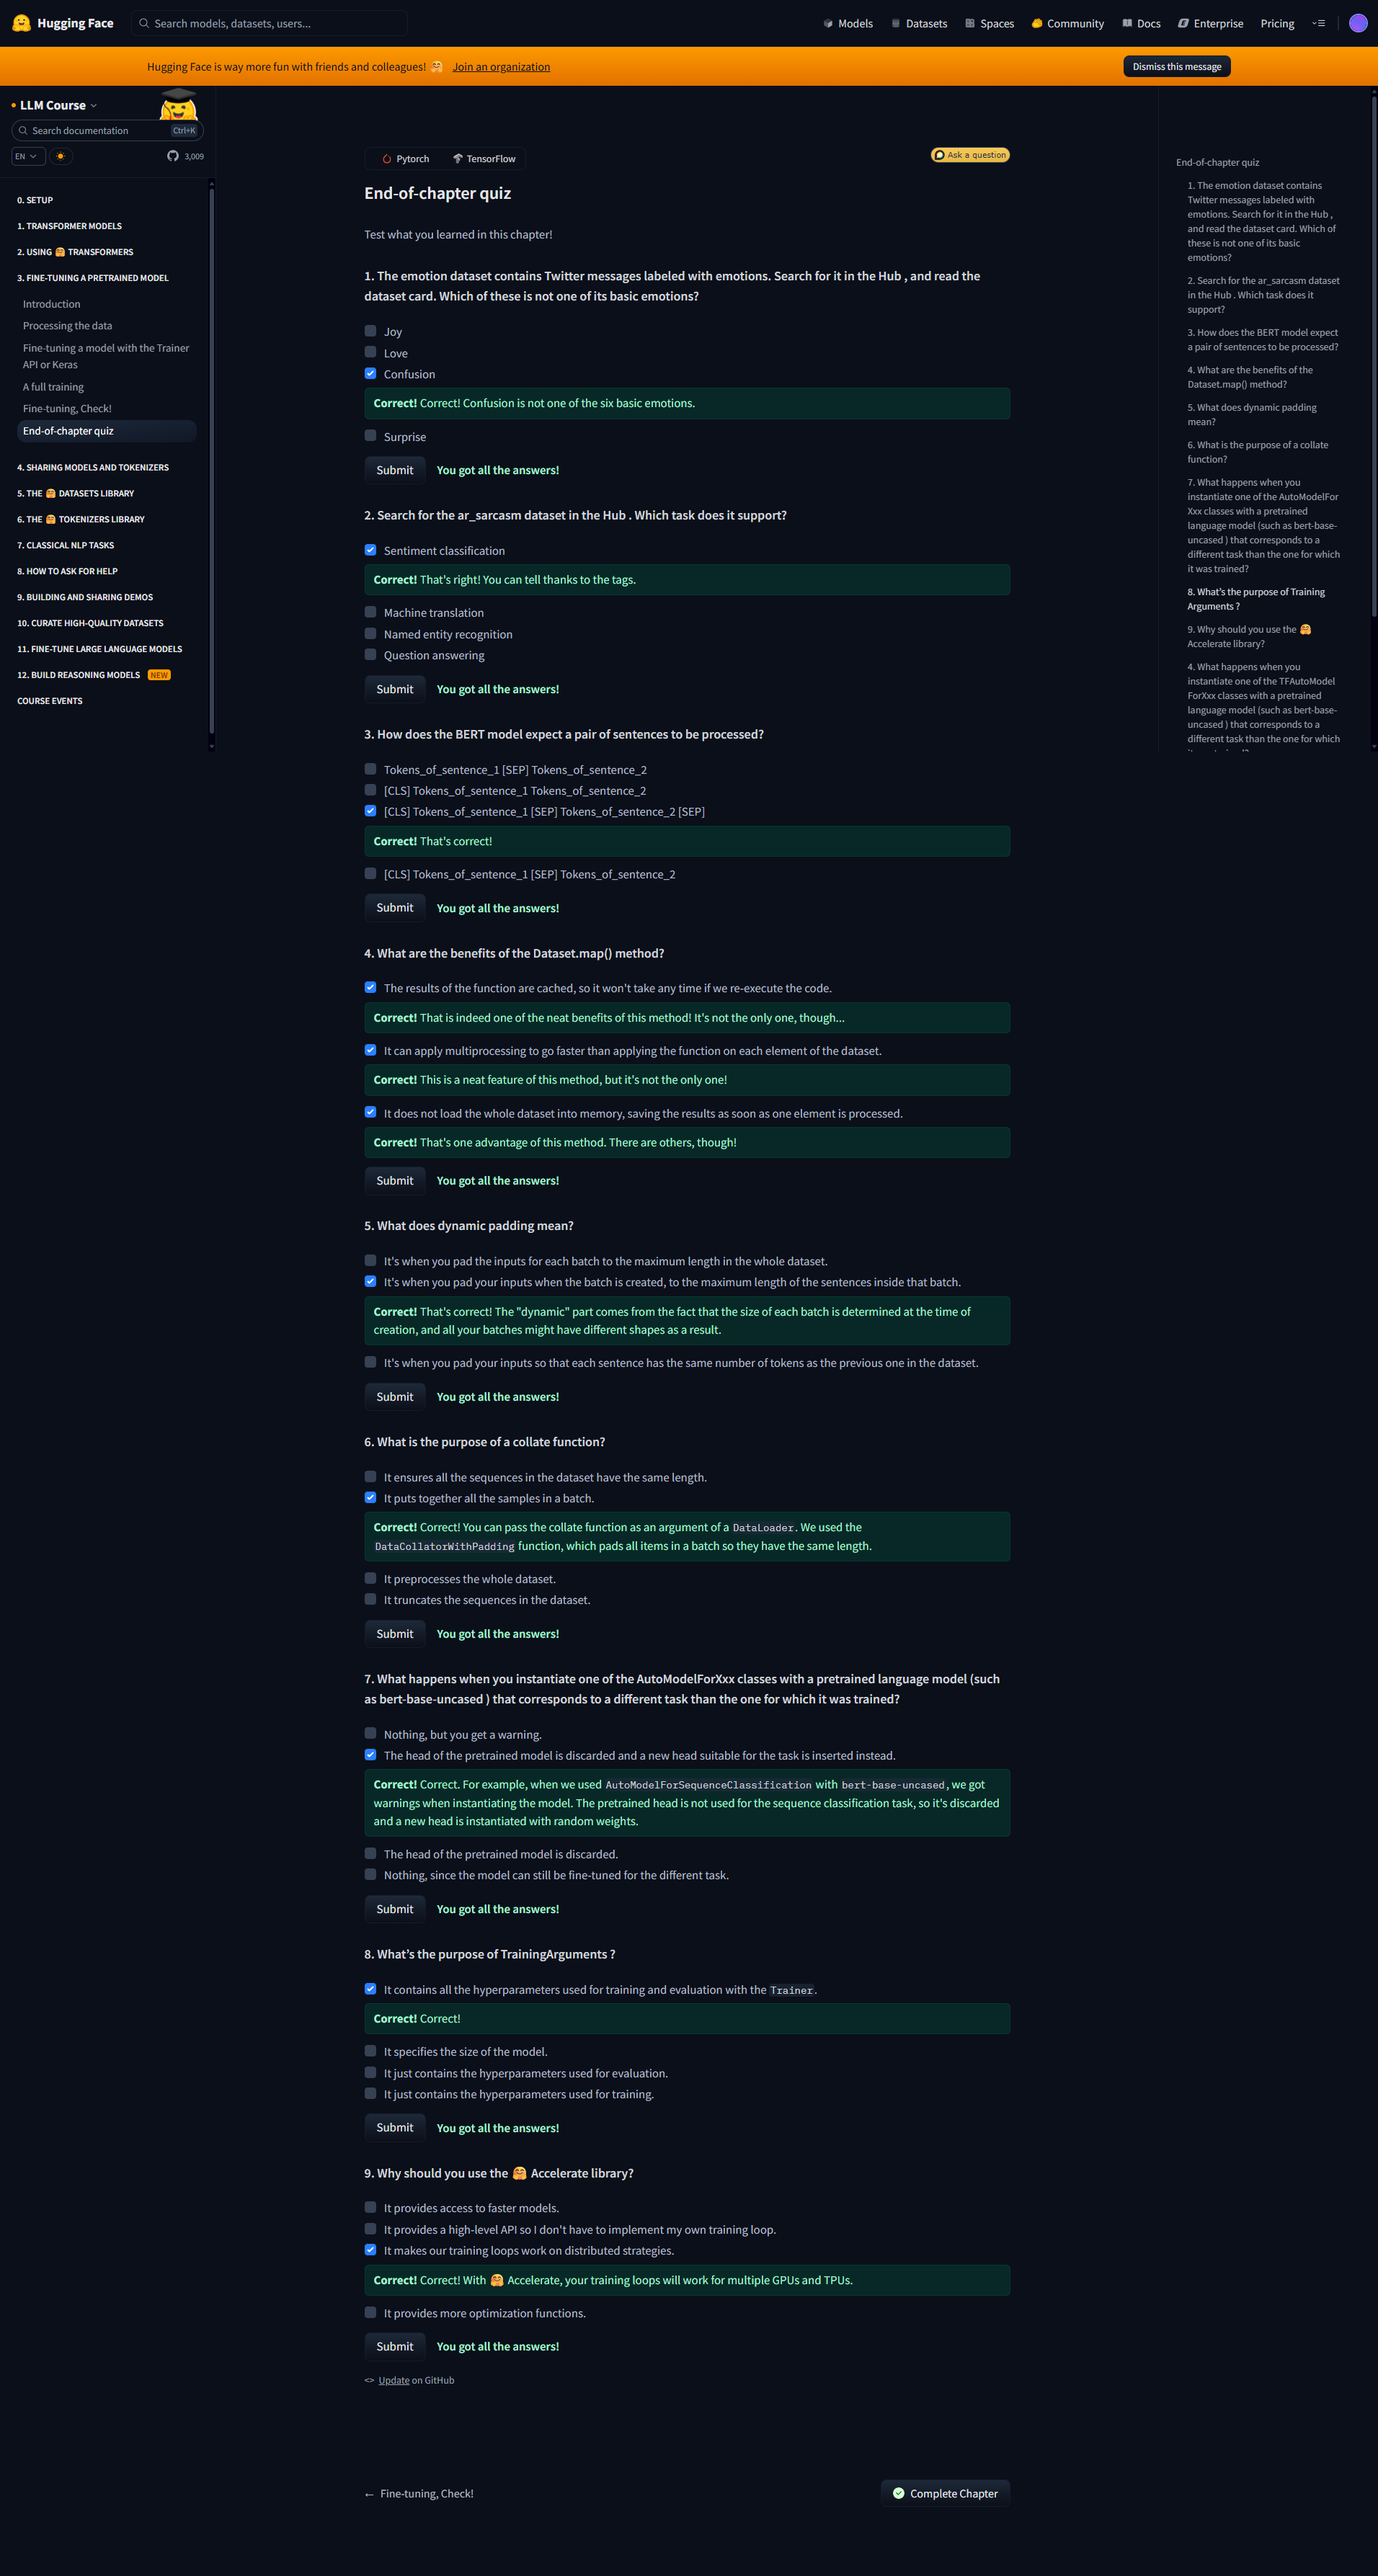

 # Questão 3: Baixe o conjunto de dados de notícias disponível em:Folha UOL News Dataset.

Utilize o modelo 'monilouise/ner_pt_br' para identificar e extrair entidades mencionadas nas notícias.
Crie um ranking das organizações que mais apareceram na seção "Mercado" no primeiro trimestre de 2015.
Apresente os resultados em um relatório detalhado, incluindo a metodologia utilizada e visualizações para apoiar a análise.

Utilizei a biblioteca transformers e o metodo pipeline para extrair as entidades. Utilizei o aggreation_strategy "average" pois, após testes, verificar que a opção "simple" não estava agrupando corretamente, conforme o exemplo abaixo:
{'entity_group': 'ORG',
  'score': np.float32(0.9660857),
  'word': 'T',
  'start': 923,
  'end': 924},
 {'entity_group': 'ORG',
  'score': np.float32(0.75828224),
  'word': '##IM',
  'start': 924,
  'end': 926},
Em seguida, verifiquei que o modelo estava separando o apóstro 's' e algumas letras de algumas entidades, como por exemplo, considerando "Moody'" e "s" como entidades separadas quando na verdade a verdadeira entidade e "Moody's".
Após essa etapa, remove a entidade "Folha" pois ela aparecia como a mais frequente, distorcendo o gráfico, e não trazendo nenhuma informação, pois uma vez que o dataset é composto de notícias da Folha da Sao Paulo, geralmente a agencia de noticias refere a si mesma apenas pelo termo "Folha". Dessa forma, cheguei ao seguinte ranking 

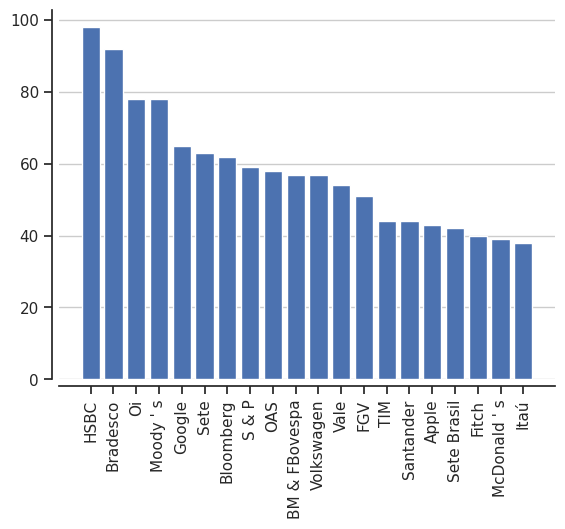

# Engenharia de Prompts

## Questão 4: Analise os seguintes prompts e identifique por que eles poderiam gerar respostas insatisfatórias ou irrelevantes:

Exemplo 1: "Escreva sobre cachorros."
Exemplo 2: "Explique física."
Subquestões:

Reformule cada prompt utilizando técnicas de engenharia de prompts para torná-los mais específicos e direcionados.
Explique as melhorias feitas em cada caso e os motivos por trás das reformulações.

Resposta: Os dois exemplos são muito generalista e não apresentam um contexto nem uma exemplo de saída. No caso do Exemplo 1, escrever sobre cachorros não especifica que tipo de informação a LLM deve escrever, ou seja, se deve falar de quantas raças existem, quais as características do animal, quando foi domesticado, etc...O exemplo 2 também não especifica qual tema da física a LLM deve explicar, se são as leis de Newton, se é sobre física quântica ou física clássica.

Para melhorar os prompts, devemos dar um contexto melhor, e falar mais sobre o tema e finalidade que queremos. No Exemplo 1, podemos reformular para os seguintes prompts:
"Escreva sobre as raças mais comuns de cachorros e suas características como: energia, agressividade, inteligência."
"Escreva sobre a história da domesticação do cachorros."

No Exemplo 2, podemos reformular para os seguintes prompts:
"Estou na quinta série e estou com dificuldade de entender as leis de newton. Me explique sobre as leis de newton e me dê exemplos"
"Estou no primeiro período da faculdade de física, me explique sobre física quântica, quais são as leis, e quem descobriu"

Nos últimos dois casos, demos uma persona para a LLM para que ela ajuste o nível de detalhe da resposta, e definimos melhor o tema.

## Questão 5: O prompt "Descreva a história da internet." foi mal formulado. Aplique técnicas de engenharia de prompts para melhorá-lo. Reformule o prompt para melhorar a especificidade e a qualidade da resposta. Justifique as mudanças feitas e explique como elas contribuem para obter uma resposta mais eficaz e relevante.



## Questão 6: Aplique a técnica de Chain of Thought (CoT) para melhorar o prompt "Explique como funciona a energia solar.", detalhando o raciocínio necessário para que o modelo forneça uma resposta completa e coerente. Explique como a aplicação da técnica CoT melhora a resposta do modelo.

# Projeto Prático com Streamlit, LLM e LangChain